In [3]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("../Feynn Labs/crop_reco.csv")

In [5]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Checking the data for Null Values

In [6]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
x = df.drop('label',axis=1)
y = df['label']

## Spliting the Data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Scaling the Data

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [11]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

## Fitting the Model

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [14]:
model.fit(scaled_x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [15]:
preds = model.predict(scaled_x_test)

In [16]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

C:\Users\rishi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


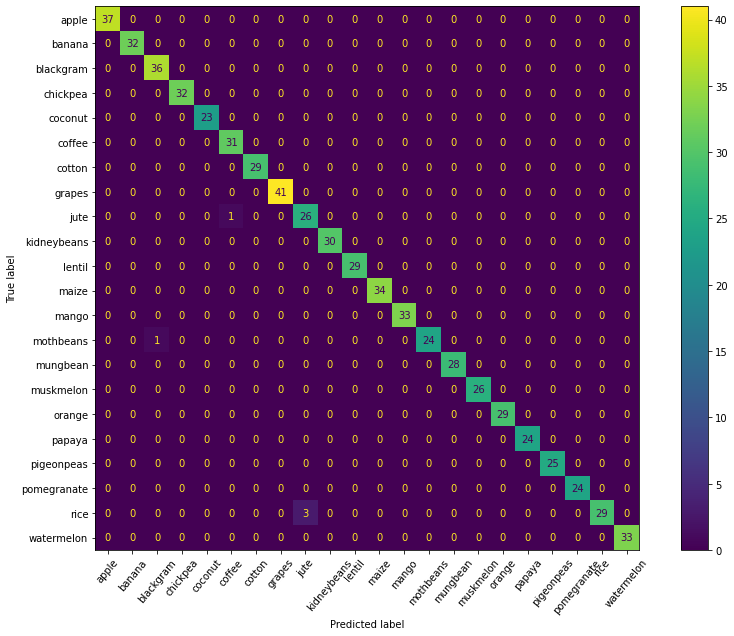

In [17]:
fig, ax = pt.subplots(figsize=(15,10))
plot_confusion_matrix(model,scaled_x_test,y_test,ax=ax,xticks_rotation=50)
pt.savefig('cf.png')

## Accuracy Score

In [18]:
accuracy_score(y_test,preds)

0.9924242424242424

In [19]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        37
      banana       1.00      1.00      1.00        32
   blackgram       0.97      1.00      0.99        36
    chickpea       1.00      1.00      1.00        32
     coconut       1.00      1.00      1.00        23
      coffee       0.97      1.00      0.98        31
      cotton       1.00      1.00      1.00        29
      grapes       1.00      1.00      1.00        41
        jute       0.90      0.96      0.93        27
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        29
       maize       1.00      1.00      1.00        34
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        28
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        29
      papaya       1.00    